In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

df=pd.read_csv('data/train.csv')
data=np.array(df)

In [2]:
data.shape

(42000, 785)

In [3]:
x = torch.tensor(data[:,1:]/1.0,dtype=torch.float32).view((-1,1,28,28))
labels = torch.from_numpy(data[:,0])

In [4]:
x.shape

torch.Size([42000, 1, 28, 28])

In [5]:
from model import Model

In [6]:
model=Model()

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
model.to(device)

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (cross_ent): CrossEntropyLoss()
)

In [7]:
model.train()

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (cross_ent): CrossEntropyLoss()
)

In [10]:
uniform_init = 0.1
for p in model.parameters():
    p.data.uniform_(-uniform_init, uniform_init)

In [11]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [12]:
optimizer.zero_grad()

In [13]:
batch_size=64

In [23]:
i=0
while i<42000/64-1:
    x_batch = x[i*batch_size:(i+1)*batch_size].to(device)
    labels_batch = labels[i*batch_size:(i+1)*batch_size].to(device)
    loss,logits = model(x_batch,labels_batch)
    loss.backward()
    grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
    optimizer.step()
    i+=1
    if i%100==0:
        print('loss= %.2f' % loss)

loss= 0.06
loss= 0.03
loss= 0.05
loss= 0.05
loss= 0.06
loss= 0.04


In [24]:
loss,logits = model(x_batch,labels_batch)

In [25]:
torch.argmax(logits,dim=1)

tensor([8, 6, 7, 1, 4, 5, 1, 6, 5, 8, 0, 2, 1, 1, 7, 3, 1, 2, 1, 1, 4, 5, 5, 4,
        9, 7, 9, 4, 8, 7, 4, 1, 1, 4, 1, 3, 4, 7, 2, 9, 1, 8, 9, 2, 8, 2, 4, 6,
        0, 9, 2, 3, 4, 4, 3, 9, 2, 4, 4, 4, 7, 2, 8, 7], device='cuda:0')

In [26]:
labels_batch

tensor([8, 6, 7, 1, 4, 5, 1, 6, 5, 8, 0, 2, 1, 1, 7, 3, 1, 2, 1, 1, 4, 5, 5, 4,
        9, 7, 9, 4, 8, 7, 4, 1, 1, 4, 1, 3, 4, 7, 2, 9, 1, 8, 9, 2, 8, 2, 4, 6,
        0, 9, 2, 3, 4, 4, 3, 9, 2, 4, 4, 4, 7, 2, 8, 7], device='cuda:0')

In [22]:
loss

tensor(0.0910, device='cuda:0', grad_fn=<NllLossBackward>)

In [27]:
df_test=pd.read_csv('data/test.csv')
data_test=np.array(df_test)

In [52]:
x_test = torch.tensor(data_test/1.0,dtype=torch.float32).view((-1,1,28,28))
labels_test = torch.zeros(x_test.size(0),dtype=torch.int64)

In [53]:
labels_test.dtype

torch.int64

In [54]:
x_test_batch = x_test[:20].to(device)
labels_test_batch = labels_test[:20].to(device)

In [55]:
x_test.shape

torch.Size([28000, 1, 28, 28])

In [63]:
model.eval()

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (cross_ent): CrossEntropyLoss()
)

In [64]:
_, logits = model(x_test_batch,labels_test_batch)

In [65]:
torch.argmax(logits,dim=1)

tensor([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 5, 3, 1, 9, 0],
       device='cuda:0')

In [66]:
import matplotlib.pyplot as plt

In [67]:
test=data_test[:20].reshape(20,28,28)

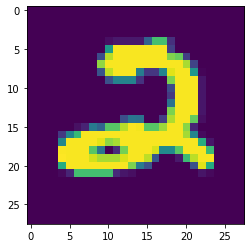

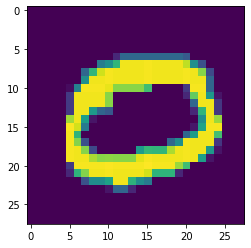

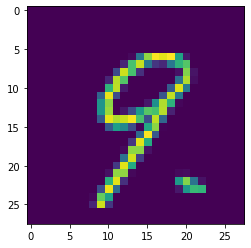

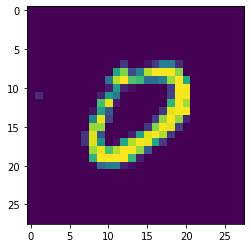

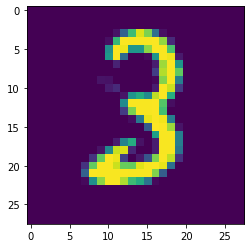

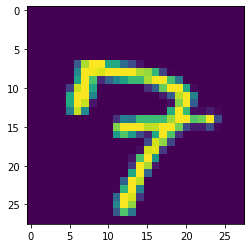

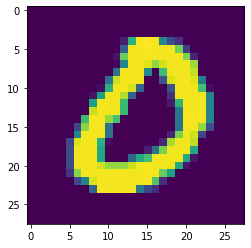

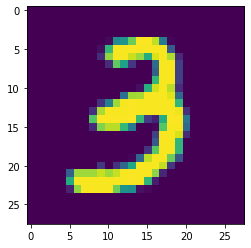

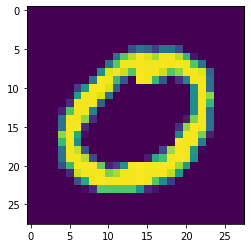

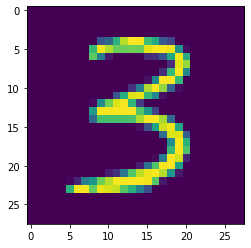

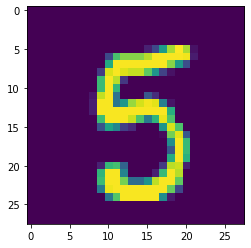

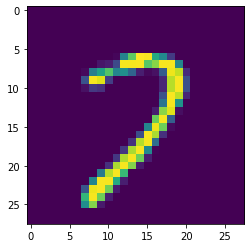

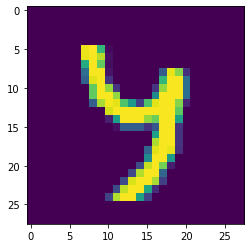

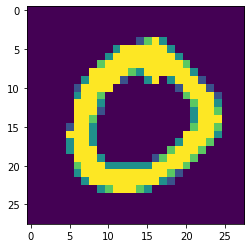

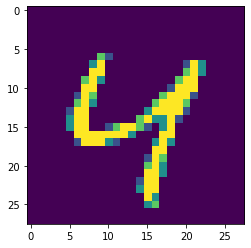

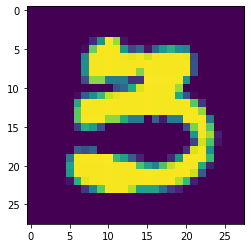

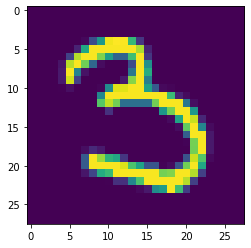

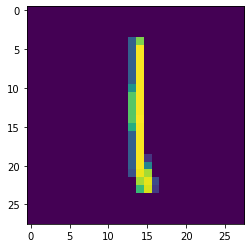

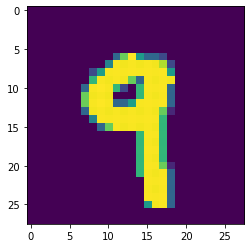

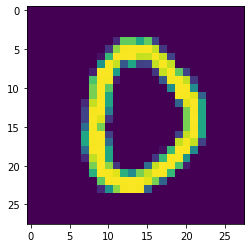

In [62]:
for t in test:
    plt.imshow(t)
    plt.show()

In [68]:
torch.save(model.state_dict(), "mnist_cnn.pt")